<a href="https://colab.research.google.com/github/pmgumble/pmgumble-Netflix-Movies-TV-Shows-clustering/blob/main/Pratik_M_Gumble_Netflix_Movies_TV_Shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>Task
 <br>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **<b><i><u>Steps</u>**
*  <b>Importing Libraries
*  <b>Import Data
*  <b>Data Summary
*  <b>Data Visualization
*  <b>Data Cleaning ( EDA )
*  <b>Feature Selection
*  <b> Model Selection
*  <b> Hyperparameter Tuning
*  <b>Conclusion

##  <b>1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

# **2. Import Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/My Drive/Netflix-Movies-TV-Shows-Clustering Pratik M Gumble/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **3. Basic Data Exploration**

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.shape

(7787, 12)

In [6]:
df.info(memory_usage = 'deep' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 7.5 MB


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*125)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    return summary

In [9]:
DataInfoAll(df)

Dataset Shape: (7787, 12)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,show_id,object,0,7787,s1,s2
1,type,object,0,2,TV Show,Movie
2,title,object,0,7787,3%,7:19
3,director,object,2389,4049,NaN,Jorge Michel Grau
4,cast,object,718,6831,"João Miguel, Bianca Comparato, Michel Gomes, R...","Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
5,country,object,507,681,Brazil,Mexico
6,date_added,object,10,1565,"August 14, 2020","December 23, 2016"
7,release_year,int64,0,73,2020,2016
8,rating,object,7,14,TV-MA,TV-MA
9,duration,object,0,216,4 Seasons,93 min


In [10]:
# Checking duplicate values
df_duplicate = df[df.duplicated()]
print("Let's print all the duplicated rows as a dataframe")
df_duplicate



Let's print all the duplicated rows as a dataframe


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


* No duplicate values present in this dataset.


From the info, we know that there are 6,234 entries and 12 columns to work with for this EDA. There are a few columns that contain null values, “director,” “cast,” “country,” “date_added,” “rating.”

There are a total of 3,036 null values across the entire dataset with 1,969 missing points under “director” 570 under “cast,” 476 under “country,” 11 under “date_added,” and 10 under “rating.” We will have to handle all null data points before we can dive into EDA and modeling.

# **Data Cleaning , Data Processing & Data Visualization**

#Checking NaN values

In [11]:
NaN_Checker = pd.DataFrame({"No Of Total Values": df.shape[0] , "No of NaN values": df.isnull().sum(),
                    "%age of NaN values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,No Of Total Values,No of NaN values,%age of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00


* **director** *column has highest NaN values 30.7% data is missing*
* **cast** *column has 9% NaN values*
* **country , date_added , rating** this columns also containing missing values

Using barplot to check the no of NaN values present in this dataset

<BarContainer object of 12 artists>

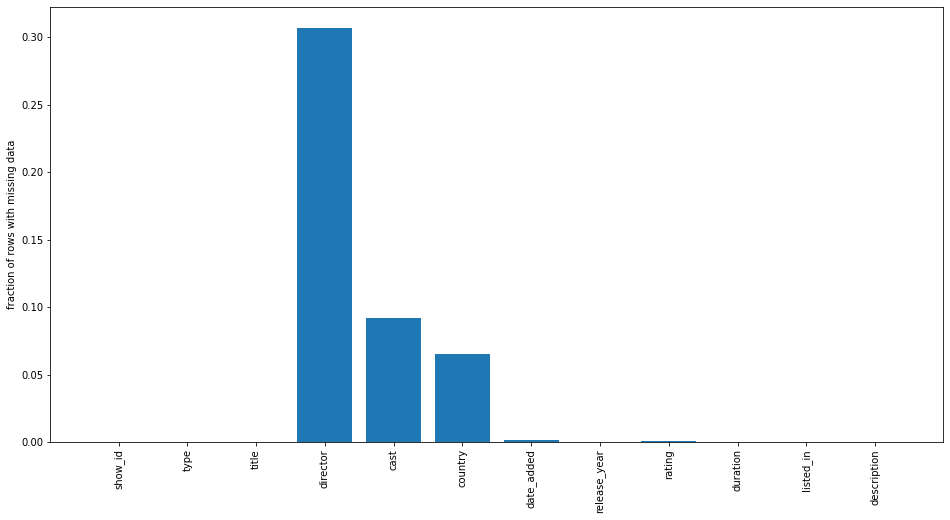

In [12]:
# null value distribution
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [13]:
df.director.fillna("No Director", inplace=True)
df.cast.fillna("No Cast", inplace=True)
df.country.fillna("Country Unavailable", inplace=True)
df.dropna(subset=["date_added", "rating"], inplace=True)

The easiest way to get rid of them would be to delete the rows with the missing data for missing values. However, this wouldn’t be beneficial to our EDA since it is a loss of information. Since “director,” “cast,” and “country” contain the majority of null values, we chose to treat each missing value is unavailable. The other two label “date_added” and “rating” contain an insignificant portion of the data, so it drops from the dataset. Finally, we can see that there are no more missing values in the data frame.

In [14]:
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [15]:
df.describe()

,release_year
count,7770.000000
mean,2013.935393
std,8.764357
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


# *Looking for unique values*

In [16]:
df.nunique()

show_id         7770
type               2
title           7770
director        4048
cast            6818
country          682
date_added      1563
release_year      73
rating            14
duration         216
listed_in        491
description     7752
dtype: int64

Unique values of type column

In [17]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

# Splitting Dataset

Here we can split data as movies and TV shows for EDA

**Netflix Movies**

In [18]:
netflix_movies = df[df['type']=='Movie'].copy()
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


**Netflix TV Shows**

In [19]:
netflix_shows = df[df['type']=='TV Show'].copy()
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


# **Exploratory Data Analysis**

Netflix is an application that keeps growing exponentially whole around the world and it is the most famous streaming platform. Let’s create an EDA through this data with beautiful charts and visuals to gain some insights.

# **Movies Vs TV Shows**

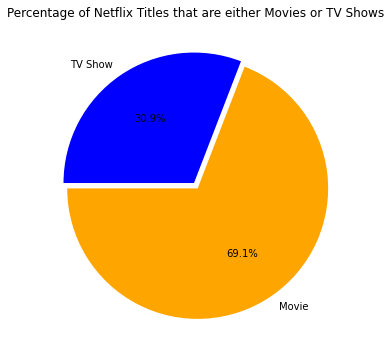

In [20]:
plt.figure(figsize=(6,6))
plt.title('Percentage of Netflix Titles that are either Movies or TV Shows')
plt.pie(df.type.value_counts(),explode=(0.025,0.025), labels=df.type.value_counts().index, colors=['orange','blue'],autopct='%1.1f%%', startangle=180)
plt.show()

**Most of the audience prefers Movies over TV Show as 69.1 percentage of audience like Movies and 30.1 percentage of audiance like TV shows.**

**Production Growth based on type of the content & release_year**

---



In [21]:
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

In [22]:
yearly_movies.head()

2021     19
2020    457
2019    414
2018    386
2017    268
Name: release_year, dtype: int64

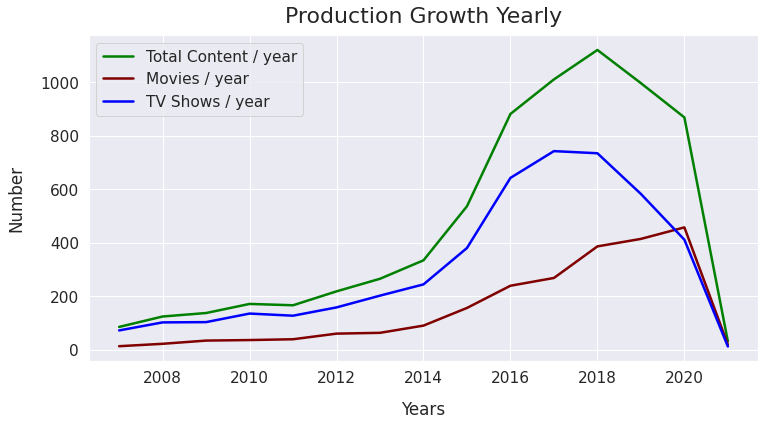

In [23]:
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);

From above graph it is evident that production of netflix contents are rapidly increased from the year 2014 onwards, down fall in production of content in the year 2020 due to pandemic situations.

**release_year**

 Let's see all unique values present in release_year

In [24]:
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

**value_count is on release_year**

In [25]:
df['release_year'].value_counts().to_frame().T

,2018,2017,2019,2016,2020,2015,2014,2013,2012,2010,...,1969,1963,1954,1970,1956,1925,1964,1966,1947,1959
release_year,1120,1010,996,881,868,536,334,265,218,171,...,2,2,2,2,2,1,1,1,1,1


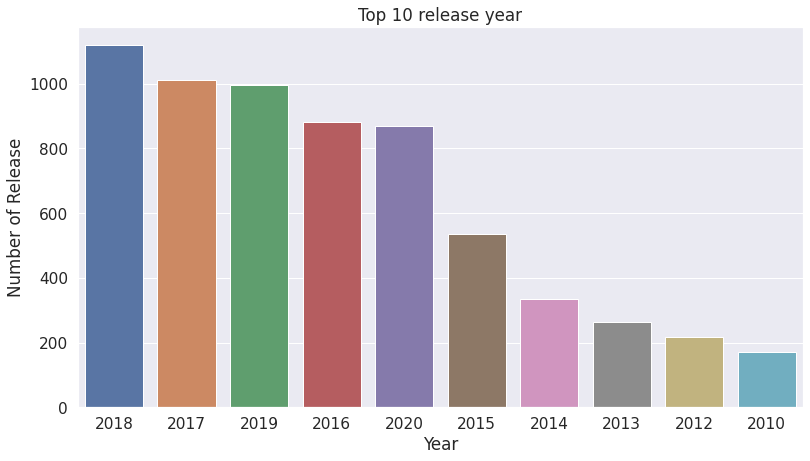

In [26]:
plt.figure(figsize=(13,7))
g = sns.countplot(x = df['release_year'], order=df['release_year'].value_counts().index[:10])
plt.title('Top 10 release year')
plt.xlabel('Year')
plt.ylabel('Number of Release')
plt.show()

In [27]:
#adding columns of month and year of addition

df['Month'] = pd.DatetimeIndex(df['date_added']).month
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1


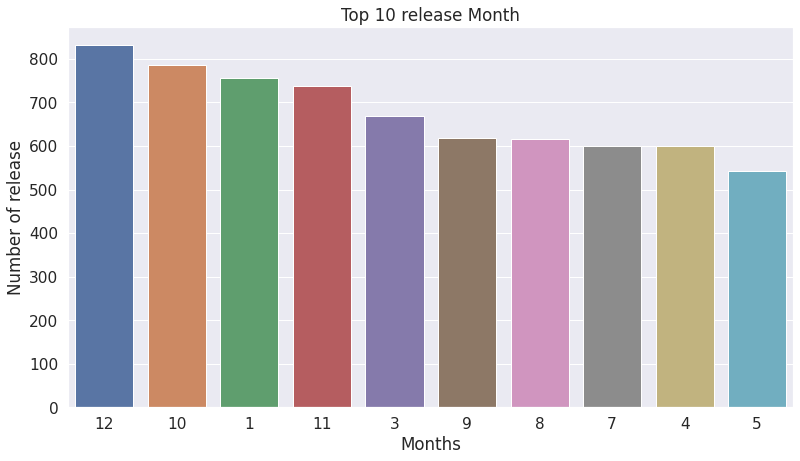

In [28]:
# Plotting the Countplot 
plt.figure(figsize=(13,7))
g = sns.countplot(x = df['Month'], order=df['Month'].value_counts().index[:10])
plt.title('Top 10 release Month')
plt.xlabel('Months')
plt.ylabel('Number of release')
plt.show()

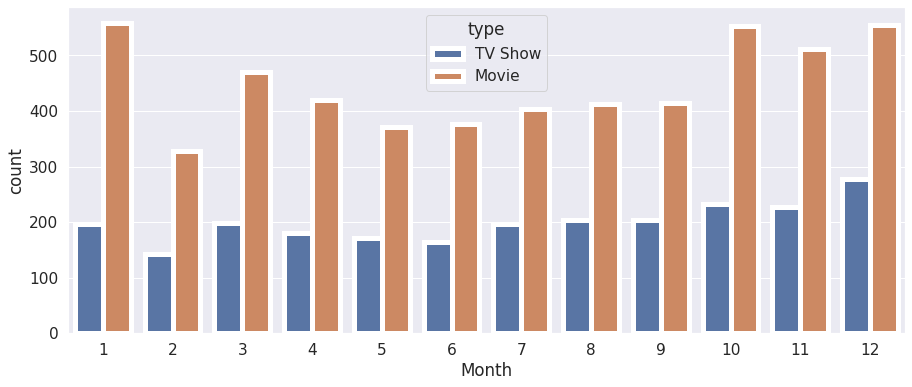

In [29]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='Month', hue='type',lw=5, data=df, ax=ax)

Rate of movies release is more as compared to the TV shows.

The best month to release content so the producer can gain much revenue. Most of the holidays came in December and Jan month in US and Europe.Most of the holidays came in India in Oct month.So to releases a Movie or TV show in between Oct to Jan is the best way to earn a lot of profit as the whole family will be spending time with each other and watching shows. The best 4 months to release content are October, November, December, and January.

**Checking outliers on release_year column**

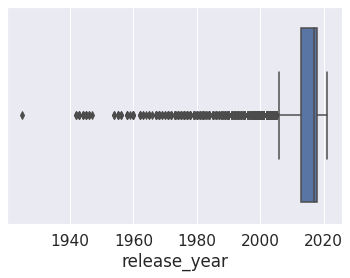

In [30]:
sns.boxplot(df.release_year)

* As we have seen earlier **before 2014 the production growth for Movies & Tv Shows were very less** ,that's why it's showing those values*(release_year less than 2009)* as outliers 

# Replacing outliers with mean value

In [31]:
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


* we don't have have any release_year which is greater than 2018








In [32]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]                                            

In [33]:
release_year_outliers

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,11
44,s45,Movie,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,"February 1, 2018",2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an...",2
94,s95,Movie,28 Days,Betty Thomas,"Sandra Bullock, Viggo Mortensen, Dominic West,...",United States,"September 30, 2020",2000,PG-13,104 min,"Comedies, Dramas",After her drunken antics result in property da...,9
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",Country Unavailable,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...,12
105,s106,Movie,300 Miles to Heaven,Maciej Dejczer,"Krzysztof Stroiński, Andrzej Mellin, Adrianna ...","Denmark, France, Poland","October 1, 2019",1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br...",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,s7746,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...,11
7749,s7750,TV Show,Yu-Gi-Oh!,No Director,"Dan Green, Eric Stuart, Amy Birnbaum, Darren D...",Japan,"July 8, 2020",2005,TV-Y7,2 Seasons,"Anime Series, Kids' TV",The lives of young Yugi Moto and his friends J...,7
7754,s7755,Movie,Yuva,Mani Ratnam,"Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...",India,"March 1, 2018",2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...,3
7760,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,"May 19, 2020",2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...,5


In [34]:
# 15 percentile value is 2009
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])

# Boxplot for release_year

In [35]:
df.release_year.describe()

count    7770.000000
mean     2016.262291
std         2.726820
min      2009.000000
25%      2013.935393
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

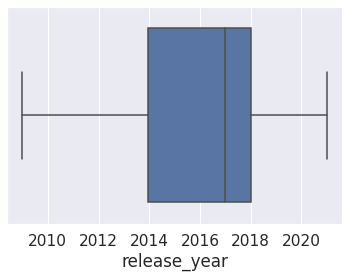

In [36]:
sns.boxplot(df.release_year)

# **Title**

Number of unique title present in title column

In [37]:
df.title.nunique()

7770

* All the values present in Title are unique

# **Most occured word in Title ??**

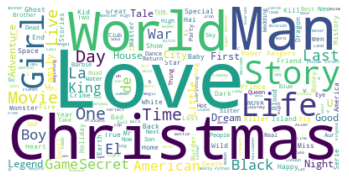

In [38]:
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.

# Countries producing most number of contents

In [39]:
df.country.nunique()

682

As you can see there are total 682 countries which are produce movies / tv shows

In [40]:
df.country.value_counts().rename_axis('Country').reset_index(name='counts').T

,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681
Country,United States,India,Country Unavailable,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,2546,923,505,396,224,183,177,134,115,101,...,1,1,1,1,1,1,1,1,1,1


# Looking for countries and number of netflix productions

In [41]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [42]:
production_country[:5]

[('', 4, 0, 4),
 ('Lithuania', 1, 0, 1),
 ('South Africa', 54, 10, 44),
 ('Bangladesh', 3, 0, 3),
 ('Country Unavailable', 505, 276, 229)]

# **Creating a new DataFrame country_df**

In [43]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [44]:
#Top 5 countries
top_countries=country_df.head()
top_countries

,country,Productions,TV-Shows,Movies
0,United States,3288,860,2428
1,India,990,75,915
2,United Kingdom,722,255,467
3,Country Unavailable,505,276,229
4,Canada,412,126,286


In [45]:
top_countries.T

,0,1,2,3,4
country,United States,India,United Kingdom,Country Unavailable,Canada
Productions,3288,990,722,505,412
TV-Shows,860,75,255,276,126
Movies,2428,915,467,229,286


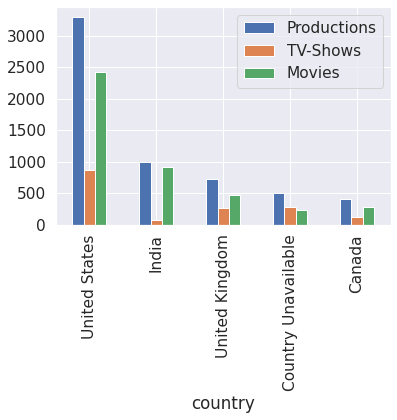

In [46]:
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

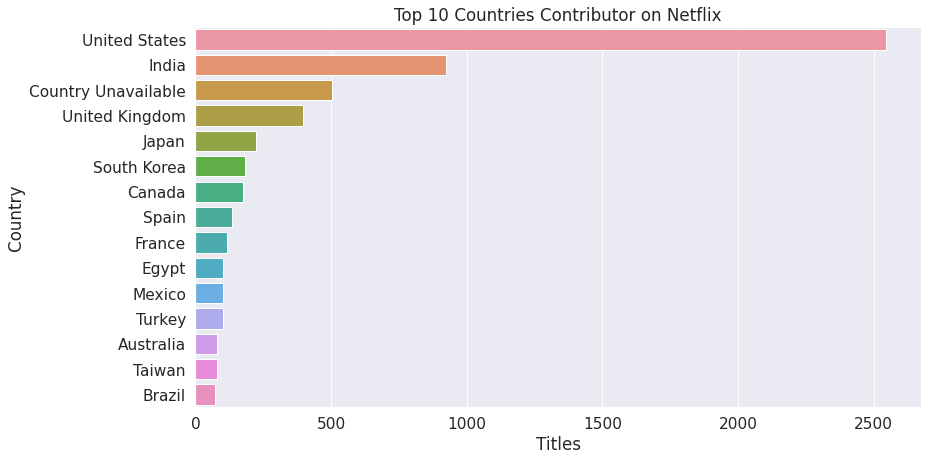

In [47]:
plt.figure(figsize=(13,7))
g = sns.countplot(y = df['country'], order=df['country'].value_counts().index[:15])
plt.title('Top 10 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

From the above bar graph, we can see the top 15 countries which contributes most on Netflix. The country by the amount of the produces content is the United States.

# **Distribution of Movies and TV shows Duration**

In [48]:
type(df.duration.iloc[0][0])

str

In [49]:
df.duration.nunique()

216

In [50]:
df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,91 min,94 min,95 min,92 min,97 min,...,13 min,214 min,13 Seasons,9 min,312 min,182 min,224 min,37 min,233 min,191 min
duration,1606,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


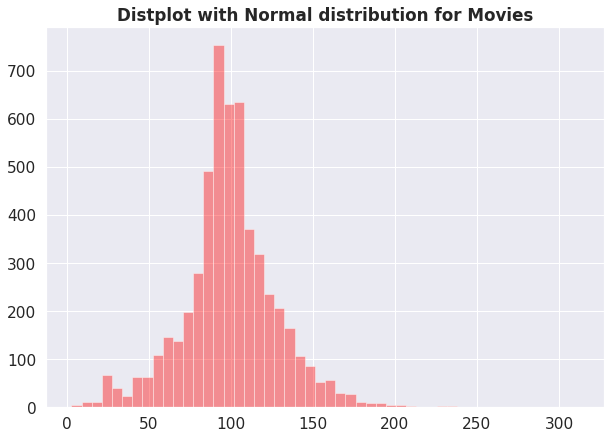

In [51]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(netflix_movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

most of the movies have duration of between 50 to 150

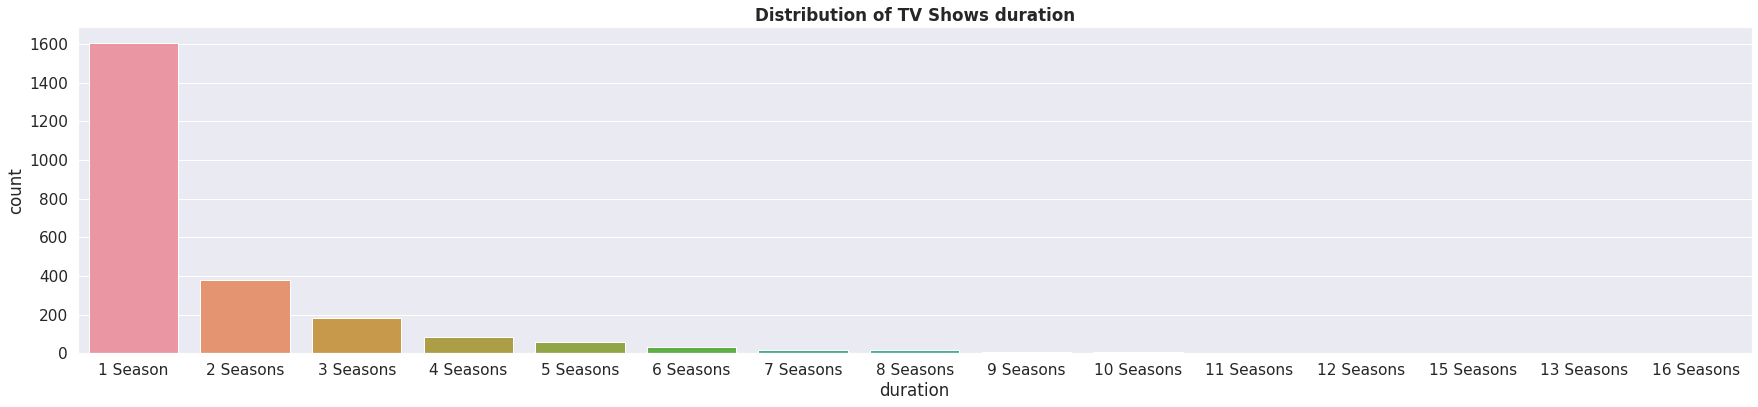

In [52]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=netflix_shows['duration'],data=netflix_shows,order = netflix_shows['duration'].value_counts().index)

# **listed_in**

In [53]:
df.listed_in.nunique()

491

There are all total 491 unique values present

In [54]:
df.listed_in.value_counts().to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
listed_in,334,321,320,243,215,204,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


# **Making Categories**

In [55]:
categories = ", ".join(df['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [56]:
len(categories)

17042

In [57]:
len(set(categories))

42

There are 42 unique categories present & in this dataset all the categories occured in total 17051 times

Creating a dictionary ( category_wise_count ) where for each category there will be a value which basically tells us how many times that particular category occured

In [58]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [59]:
category_wise_count

{'TV Sci-Fi & Fantasy': 75,
 'Horror Movies': 312,
 'TV Action & Adventure': 149,
 'Dramas': 2105,
 'Sports Movies': 196,
 'Action & Adventure': 721,
 'Cult Movies': 59,
 'Classic Movies': 103,
 'TV Thrillers': 50,
 'Science & Nature TV': 85,
 'Independent Movies': 673,
 'TV Comedies': 517,
 'Teen TV Shows': 60,
 'Faith & Spirituality': 57,
 'Documentaries': 786,
 'International TV Shows': 1197,
 'Romantic TV Shows': 333,
 'Anime Features': 57,
 'Korean TV Shows': 150,
 'Children & Family Movies': 532,
 'Movies': 52,
 'TV Shows': 12,
 'Stand-Up Comedy': 329,
 'TV Mysteries': 90,
 'British TV Shows': 231,
 'Reality TV': 222,
 'Sci-Fi & Fantasy': 218,
 'Spanish-Language TV Shows': 146,
 'TV Dramas': 703,
 'Music & Musicals': 321,
 'TV Horror': 69,
 'Docuseries': 352,
 "Kids' TV": 411,
 'Comedies': 1471,
 'LGBTQ Movies': 90,
 'Stand-Up Comedy & Talk Shows': 52,
 'Crime TV Shows': 426,
 'Romantic Movies': 531,
 'Thrillers': 491,
 'Anime Series': 146,
 'Classic & Cult TV': 25,
 'Internation

* Sorting category_wise_count by value



In [60]:
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Movies', 52)]

* Top 5 least occurred category

In [61]:
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Movies', 52),
 ('Stand-Up Comedy & Talk Shows', 52)]

* Top 10 most occurred category

In [62]:
sorted_category_wise_count[-5:]

[('Documentaries', 786),
 ('International TV Shows', 1197),
 ('Comedies', 1471),
 ('Dramas', 2105),
 ('International Movies', 2437)]

* Top 10 most occurred categories 

In [63]:
 top_10_most_occurred_categories = sorted_category_wise_count[-10:]
 top_10_most_occurred_categories

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1197),
 ('Comedies', 1471),
 ('Dramas', 2105),
 ('International Movies', 2437)]

In [64]:
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_most_occurred_categories:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

top_10_most_occurred_category_name

['Romantic Movies',
 'Children & Family Movies',
 'Independent Movies',
 'TV Dramas',
 'Action & Adventure',
 'Documentaries',
 'International TV Shows',
 'Comedies',
 'Dramas',
 'International Movies']

In [65]:
top_10_most_occurred_category_count

[531, 532, 673, 703, 721, 786, 1197, 1471, 2105, 2437]

# **TOP 10 Most Occurred Category By Count**

<Figure size 1152x576 with 0 Axes>

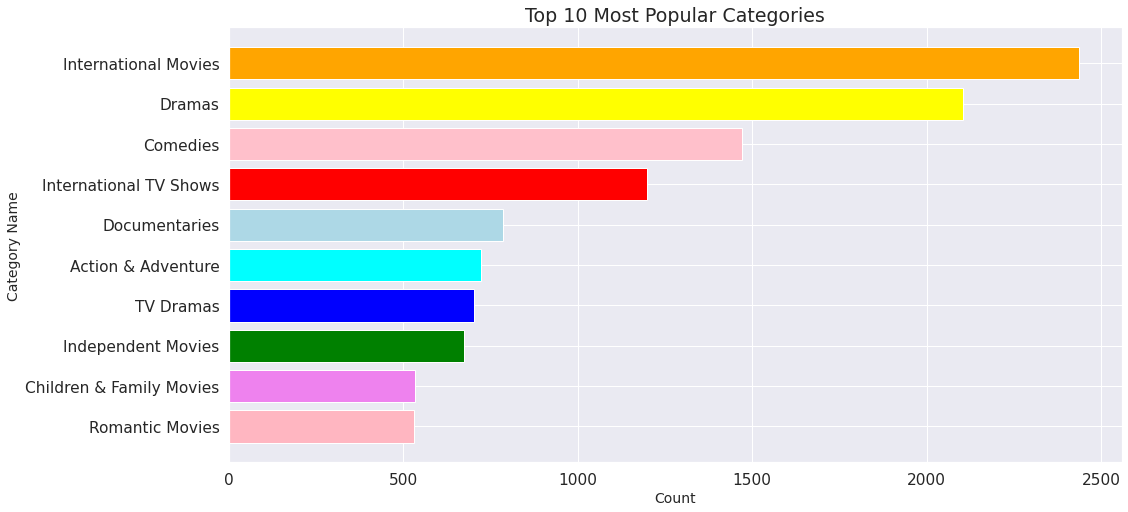

<Figure size 1152x576 with 0 Axes>

In [66]:
plt.figure( figsize = (16,8))
color=['lightpink', 'violet', 'green', 'blue', 'cyan' , "lightblue" ,'red', 'pink', 'yellow', 'orange']
plt.barh(top_10_most_occurred_category_name , top_10_most_occurred_category_count ,
        color= color)
plt.title("Top 10 Most Popular Categories",fontsize = 19)
plt.xlabel("Count", fontsize = 14 )
plt.ylabel("Category Name" , fontsize = 14 )
plt.figure( figsize = (16,8))

# **Top 10 Directors**

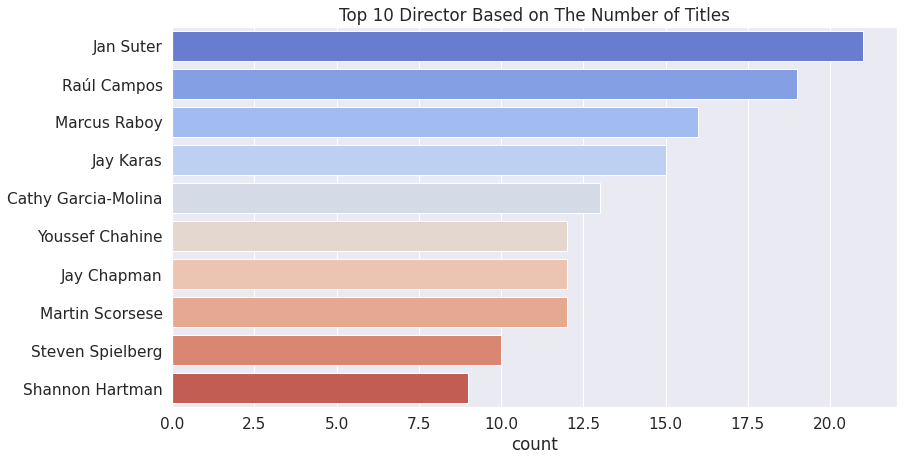

In [67]:
filtered_directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='coolwarm')
plt.show()

The most popular director on Netflix, with the most titles, is Jan Suter and next is Raul Compos.

# **Rating**

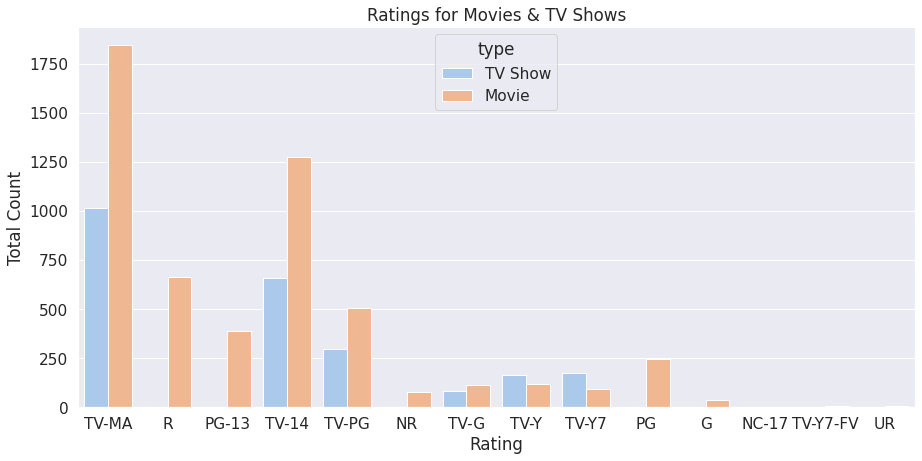

In [68]:
plt.figure(figsize=(15,7))
g = sns.countplot(df.rating, hue=df.type, palette="pastel");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

The largest count of TV shows is made with a “TV-MA” rating. “TV-MA” is a rating assigned by the TV Parental Guidelines to a television program designed for mature audiences only.

# **Top actors on Movies and Netflix**

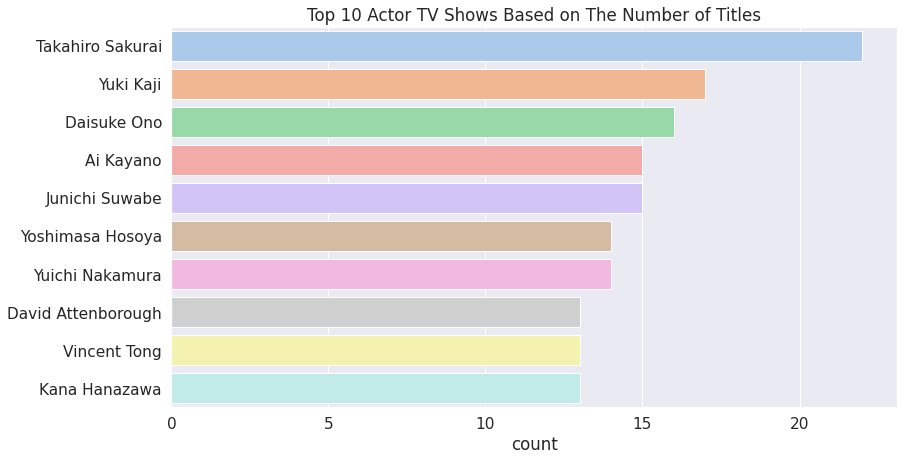

In [69]:
filtered_cast_shows = netflix_shows[netflix_shows.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

The top actor on Netflix TV Show, based on the number of titles, is Takahiro Sakurai.

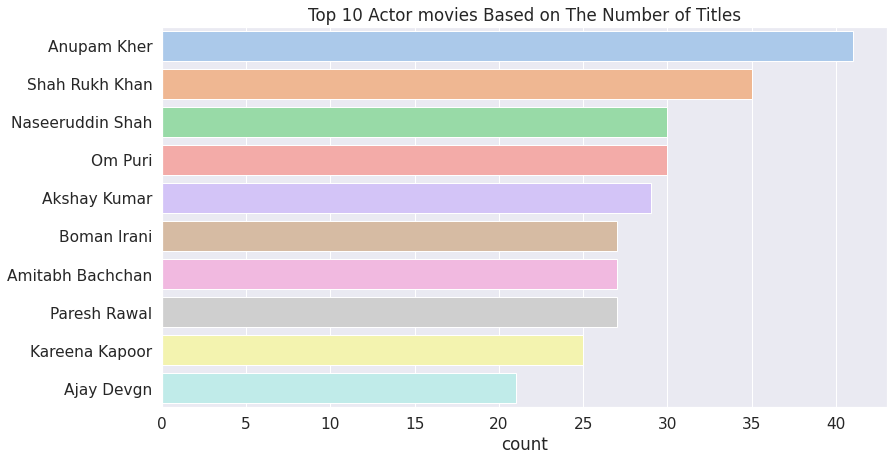

In [70]:
filtered_cast_movies = netflix_movies[netflix_movies.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movies, order=filtered_cast_movies.value_counts().index[:10], palette='pastel')
plt.show()

The top actor on Netflix Movies, based on the number of titles, is Anupam Kher.

# **Netflix Contents available for different age groups with different countries**

In [71]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

# **Correlation Heatmap**

In [72]:
# type should be a catego

df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [73]:
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']

Netflix_dataset_heatmap = df.loc[df['country'].isin(data)]
Netflix_dataset_heatmap = pd.crosstab(Netflix_dataset_heatmap['country'], Netflix_dataset_heatmap['target_ages'],normalize = "index").T
Netflix_dataset_heatmap

country,Canada,Country Unavailable,Egypt,France,India,Japan,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.170297,0.000000,0.095652,0.016251,0.008929,0.027322,0.022388,0.093434,0.073449
Older Kids,0.225989,0.235644,0.039604,0.060870,0.160347,0.272321,0.120219,0.044776,0.204545,0.187353
Teens,0.146893,0.275248,0.683168,0.165217,0.567714,0.352679,0.382514,0.097015,0.189394,0.236842
Adults,0.446328,0.318812,0.277228,0.678261,0.255688,0.366071,0.469945,0.835821,0.512626,0.502357


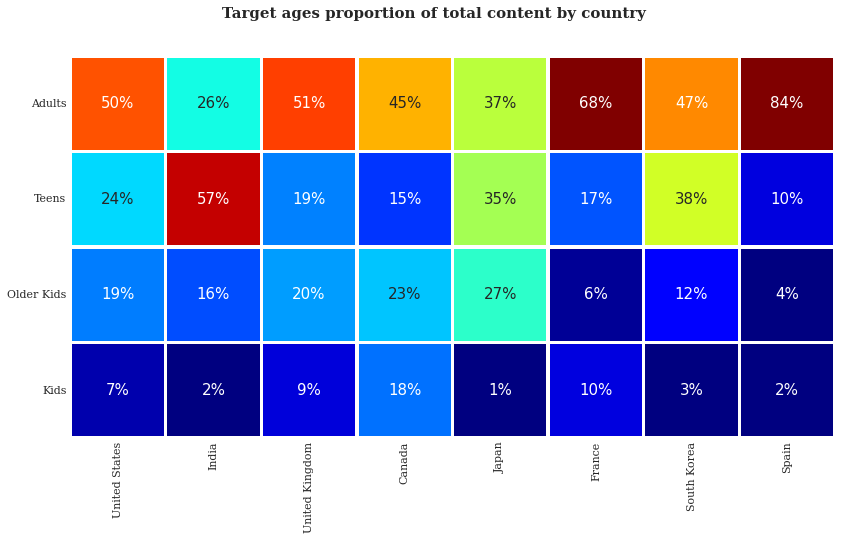

In [74]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(Netflix_dataset_heatmap.loc[age_order,country_order2],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

From the corr. graph it is clear that in Spain,France,UK and US mostly adults peoples like to watch moveies and TV shows.

While in India 57 percentage of teens watching movies and TV shows and only 26 percentage of adults like to watching movies and TV shows.

That means in India Netflix need to more concentrate to Teens.

# **India**

In [75]:
grp = df.groupby('country')
India=grp.get_group('India')

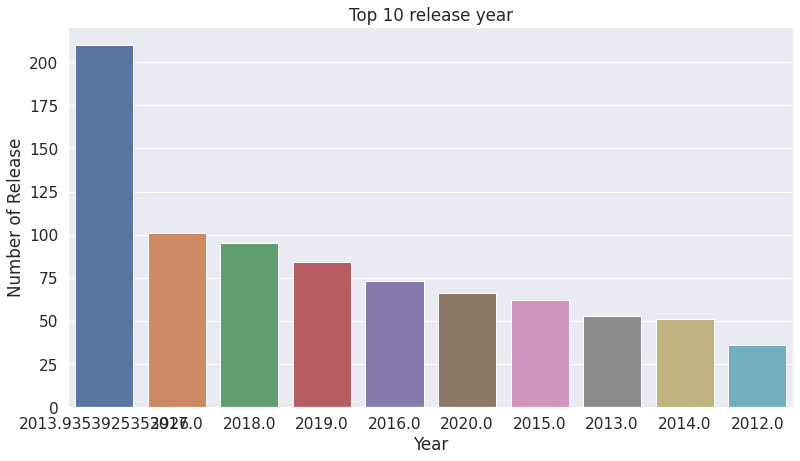

In [76]:
plt.figure(figsize=(13,7))
g = sns.countplot(x = India['release_year'], order=India['release_year'].value_counts().index[:10])
plt.title('Top 10 release year')
plt.xlabel('Year')
plt.ylabel('Number of Release')
plt.show()

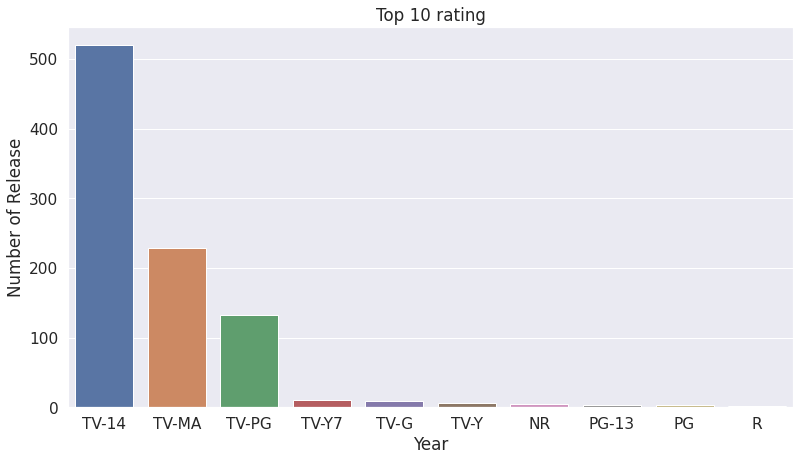

In [77]:
plt.figure(figsize=(13,7))
g = sns.countplot(x = India['rating'], order=India['rating'].value_counts().index[:10])
plt.title('Top 10 rating')
plt.xlabel('Year')
plt.ylabel('Number of Release')
plt.show()

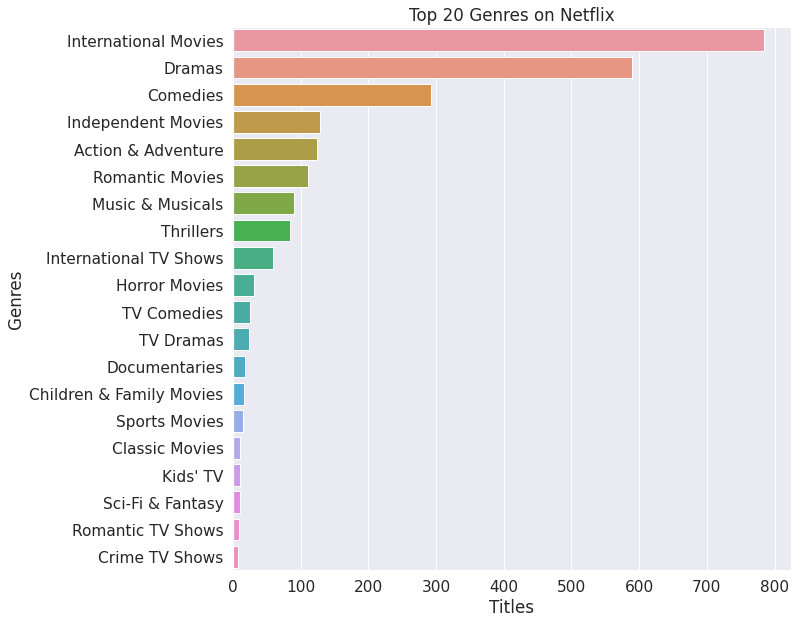

In [78]:
filtered_genres1 = India.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres1,order=filtered_genres1.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

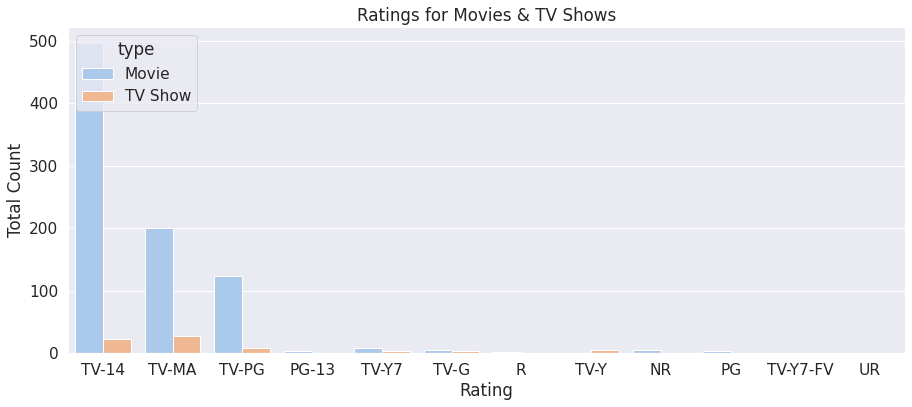

In [79]:
plt.figure(figsize=(15,6))
g = sns.countplot(India.rating, hue=India.type, palette="pastel");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

In [80]:
new_Netflix_dataset = df.drop(columns=['show_id','director', 'title', 'cast','duration', 'date_added', 'description'],axis=1)
new_Netflix_dataset

,type,country,release_year,rating,listed_in,Month,target_ages,count
0,TV Show,Brazil,2020.000000,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",8,Adults,1
1,Movie,Mexico,2016.000000,TV-MA,"Dramas, International Movies",12,Adults,1
2,Movie,Singapore,2011.000000,R,"Horror Movies, International Movies",12,Adults,1
3,Movie,United States,2009.000000,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",11,Teens,1
4,Movie,United States,2013.935393,PG-13,Dramas,1,Teens,1
...,...,...,...,...,...,...,...,...
7782,Movie,"Sweden, Czech Republic, United Kingdom, Denmar...",2013.935393,TV-MA,"Dramas, International Movies",10,Adults,1
7783,Movie,India,2015.000000,TV-14,"Dramas, International Movies, Music & Musicals",3,Teens,1
7784,Movie,Country Unavailable,2019.000000,TV-MA,"Documentaries, International Movies, Music & M...",9,Adults,1
7785,TV Show,Australia,2019.000000,TV-PG,"International TV Shows, Reality TV",10,Older Kids,1


# **Data Encoding**


In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_Netflix_dataset["type"] = le.fit_transform(new_Netflix_dataset["type"])
new_Netflix_dataset["country"] = le.fit_transform(new_Netflix_dataset["country"])
new_Netflix_dataset["target_ages"] = le.fit_transform(new_Netflix_dataset["target_ages"])
new_Netflix_dataset['rating'] = le.fit_transform(new_Netflix_dataset['rating'])
new_Netflix_dataset['listed_in'] = le.fit_transform(new_Netflix_dataset['listed_in'])

# **Data Standarization**

In [82]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [83]:
# transform the data using StandardScaler

X = pd.DataFrame(StandardScaler().fit_transform(new_Netflix_dataset),columns = new_Netflix_dataset.columns)

In [84]:
X.shape

(7770, 8)

In [85]:
type(X)

pandas.core.frame.DataFrame

# **PCA**

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

In [86]:
from sklearn.decomposition import PCA

In [87]:
# function to understand the variance for different n_components
def pca_variance(n_components):
  pca= PCA(n_components= n_components)
  pca.fit(X)
  print(sum(pca.explained_variance_ratio_))

In [125]:
pca_variance(7)

1.0


In [126]:
pca = PCA(n_components=7)
pca.fit(X)

PCA(n_components=7)

Text(0.5, 1.0, 'No. of components VS Explained variance')

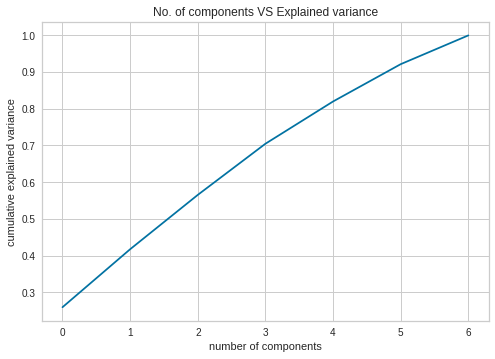

In [127]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('No. of components VS Explained variance')

Typically, we want the explained variance to be between 95–99%.

In this case, to get 99%(most approximate is 100%)of variance explained I need 7 principal components

In [91]:
X_pca = pca.fit_transform(X)

In [92]:
X_pca.shape

(7770, 7)

# **Applying Different Clustering Algorithms**

**Clustering: -**
Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data.A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

# **KMeans Clustering**

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [94]:
kmeans = KMeans( init="k-means++", n_clusters=8, max_iter=300,   random_state=0)

# **Find out how many clusters are used?**

# **K-Elbow Method**

The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [95]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a8a7c89d0>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 locate_elbow=False, timings=False)

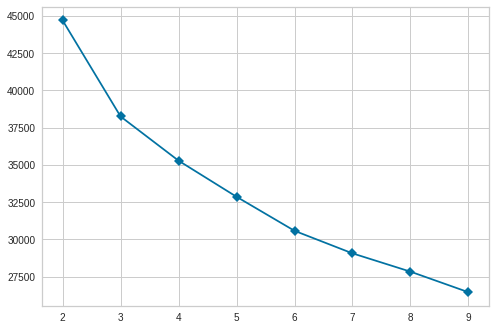

In [96]:
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric= 'distortion', timings= False, locate_elbow= False)
visualizer.fit(X)

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 4.

In [97]:
import numpy as np

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a8aac0760>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 metric='silhouette', timings=False)

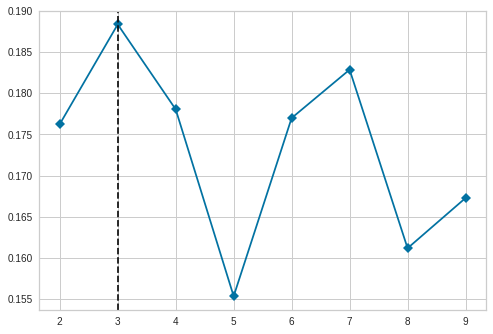

In [98]:
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='silhouette', timings=False, locate_elbow=True)
visualizer.fit(X)

# **Silhouette Score**

The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [99]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [100]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters)
      preds = km.fit_predict(X)
      centers = km.cluster_centers_

      score = silhouette_score(X, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.17705579846281397


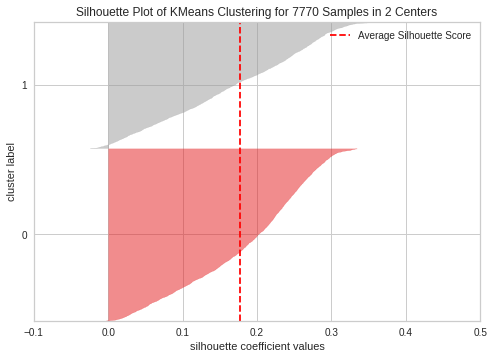

For n_clusters = 3, silhouette score is 0.1883670258470756


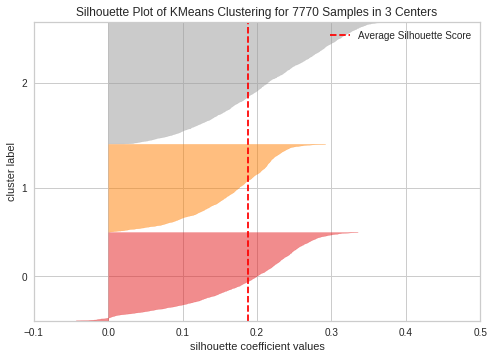

For n_clusters = 4, silhouette score is 0.17907236997528836


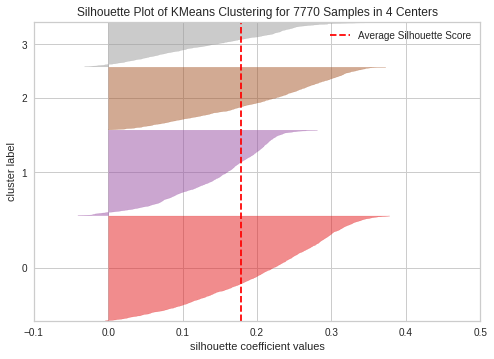

For n_clusters = 5, silhouette score is 0.1553479962910114


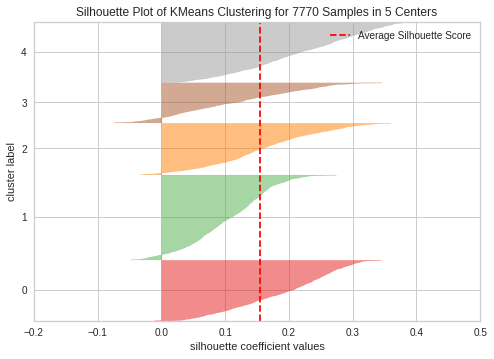

For n_clusters = 6, silhouette score is 0.1772754775006096


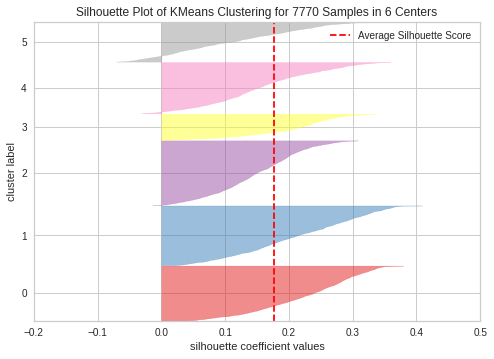

For n_clusters = 7, silhouette score is 0.18256493863062262


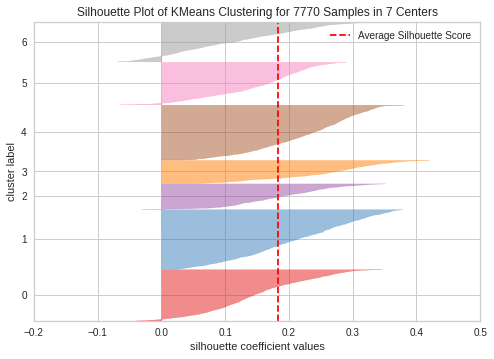

In [101]:
silhouette_score_analysis(8)

Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters.

The value of 3 for n_clusters looks to be the optimal one. The silhouette score for each cluster is above average silhouette scores

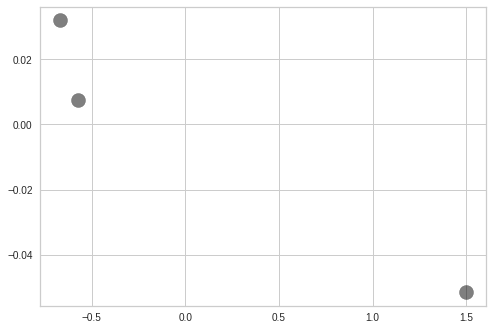

In [102]:
# looks like we can go with 3 clusters.

kmeans= KMeans(n_clusters=3, init= 'k-means++',max_iter=300, n_init=1)

kmeans.fit(X)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [103]:
labels = kmeans.fit_predict(X)

In [104]:
# silhouette score of my clusters
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, kmeans.labels_))

Silhouette Coefficient: 0.187


# **K Means Clustering**

In [108]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=3, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X_pca)

KMeans(n_clusters=3, n_init=1)

In [109]:
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X_pca, kmeans.labels_))

Silhouette Coefficient:  0.187


In [110]:
#predict the labels of clusters.
label = kmeans.fit_predict(X_pca)

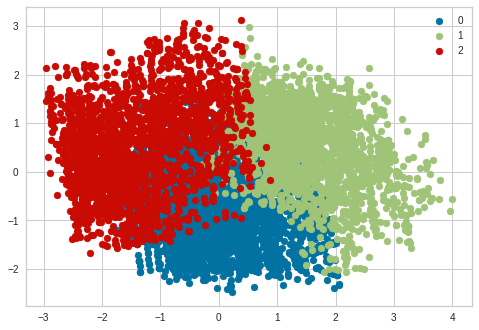

In [111]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

# **Hirarchical clustering**

Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.

In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

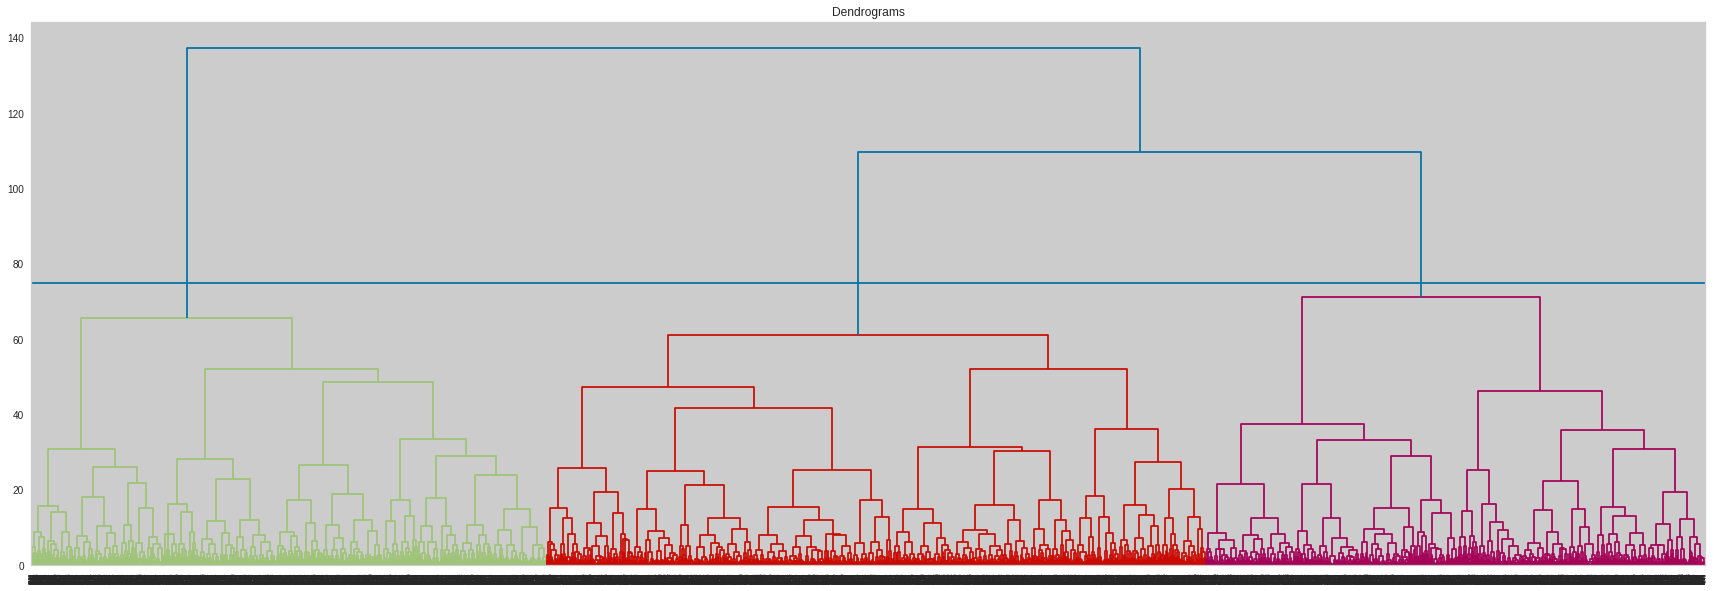

In [112]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

plt.axhline(y=75)

Assume we cut vertical lines with a horizontal line to obtain the number of clusters. Number of clusters = 3

# ***Agglomerative CLustering***

The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets.

In [115]:
# Fitting hierarchical clustering 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_pca)

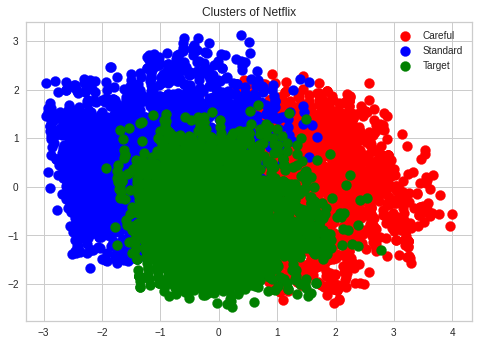

In [117]:
# Visualizing the clusters (two dimensions only)
plt.scatter(X_pca[y_hc == 0, 0], X_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X_pca[y_hc == 1, 0], X_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X_pca[y_hc == 2, 0], X_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
# plt.scatter(X_pca[y_hc == 3, 0], X_pca[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
#plt.scatter(X_pca[y_hc == 4, 0], X_pca[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of Netflix')
plt.legend()
plt.show()

# **Conclusion**

We have drawn many interesting inferences from the dataset Netflix titles; here’s a summary of the few of them:

1. The most content type on Netflix is movies.It appears that Netflix has focused more attention on increasing Movie content than TV Shows. Movies have increased much more dramatically than TV shows

2. There are about 70% movies and 30% TV shows on Netflix.

3. Most films were released in the years 2018, 2019, and 2020.

4. The number of releases have significantly increased after 2015 and have dropped in 2021 because of Covid 19.

5. The months of October, November, December and January had the largest number of films and television series released.

6. More of the content is released in holiday season - October, November, December and January.

7. The United States has the highest number of content on Netflix by a huge margin followed by India.

8. Raul Campos and Jan Sulter collectively have directed the most content on Netflix.

10. International movies are the top most genre in netflix which is fllowed by standup comedy and Drams.

11. Most of the movies have duration of between 50 to 150

12. Using correlation heatmap we see that in India mostly teens watching netflix so question arrises that what content teens watched.

13. TV-MA has the highest number of ratings for tv shows i,e adult ratings

14. In India teens mostly watched international movies.

15. Principal Component analysis (PCA)reduced the number of componets as 7 with approximately 99% of variance.

16. For K Means clustering to find out number of k we used elbow and sillhoute score method.

17. Using both the methods we found k=3 is optimal value of clustering.

18. Using Hirarchical clustering method again we find out that k=3 is optimal value of clustering.